In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Example molecular fingerprints for multiple herbs (replace with your actual data)
herb1_fingerprint = np.array([0, 1, 1, 0, 1, 0, 1, 0])
herb2_fingerprint = np.array([1, 1, 0, 0, 1, 1, 0, 1])
herb3_fingerprint = np.array([0, 1, 0, 1, 0, 1, 0, 1])

# Labels for each herb (replace with your actual labels)
labels = np.array([0, 1, 0])

# Combine fingerprints and labels into a dataset
herb_fingerprints = np.array([herb1_fingerprint, herb2_fingerprint, herb3_fingerprint])
herb_labels = np.array([0, 1, 0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(herb_fingerprints, herb_labels, test_size=0.2, random_state=42)

# Normalize the data (optional, depending on the nature of your fingerprints)
X_train_normalized = X_train / 1.0  # Replace 1.0 with an appropriate normalization factor
X_test_normalized = X_test / 1.0  # Replace 1.0 with the same normalization factor

# DCGAN code

latent_dim = 100  # Set an appropriate latent dimension
fingerprint_dim = 8  # Replace with the actual dimensionality of your molecular fingerprints

# Define DCGAN Generator
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(128, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(fingerprint_dim, activation='sigmoid'))  # Adjust activation based on fingerprint format
    return model

# Define DCGAN Discriminator
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(128, input_shape=(fingerprint_dim,)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Combine Generator and Discriminator into a GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Instantiate models
generator = build_generator()
discriminator = build_discriminator()

# Compile models
generator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))

# Define hyperparameters
epochs = 10000  # Adjust as needed
batch_size = 32  # Adjust as needed
half_batch = batch_size // 2

# Training loop
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train_normalized.shape[0], half_batch)
    real_fingerprints = X_train_normalized[idx]

    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    generated_fingerprints = generator.predict(noise)

    real_labels = np.ones((half_batch, 1))
    generated_labels = np.zeros((half_batch, 1))

    d_loss_real = discriminator.train_on_batch(real_fingerprints, real_labels)
    d_loss_generated = discriminator.train_on_batch(generated_fingerprints, generated_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_generated)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, valid_labels)



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step


In [ ]:
# Print progress and visualize
if epoch % 100 == 0:
    print(f"Epoch {epoch}/{epochs} [D loss: {d_loss}] [G loss: {g_loss}]")


In [ ]:
    # Visualize generated fingerprints (for illustration purposes)
    if epoch % 500 == 0:
        generated_samples = generator.predict(np.random.normal(0, 1, (10, latent_dim)))
        print("Generated Samples:")
        print(generated_samples)

1/1 [==============================] - 0s 59ms/step


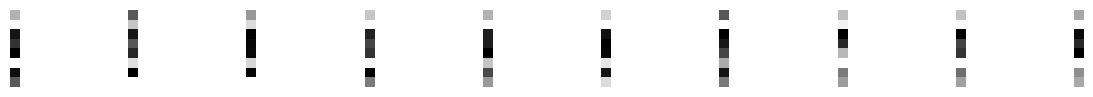

In [ ]:
# Generate synthetic fingerprints
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_samples = generator.predict(noise)

# Visualize generated fingerprints using Matplotlib
fig, axs = plt.subplots(1, num_samples, figsize=(15, 1))
for i in range(num_samples):
    axs[i].imshow(generated_samples[i].reshape((fingerprint_dim, 1)), cmap='gray')
    axs[i].axis('off')
plt.show()


In [ ]:
generator.save('generator_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
